In [1]:
from graph_var.evaluating_functions import *
from graph_var.utils import *
import os
# AT or Position
mode = 'AT'
gfa_dir = '/n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/Data/chromosome_gfa'
graph_obj_dir = '/n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/Graph_obj_chr'
snarl_dir = '/n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/Data/chr_snarls'
summary_dir = '/n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/Bubble_result_update'
vcf_dir = '/n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/VCFs_chr'

In [2]:
chr_list = list(range(1,23))
#chr_list = [21]

for chr in chr_list:
    print(f"Processing chr{chr}...")
    gfa_path = f"{gfa_dir}/chr{chr}.gfa"
    snarl_path = f"{snarl_dir}/chr{chr}.snarls"
    graph_path = f"{graph_obj_dir}/chr{chr}.pkl"


    write_bubble_summary_result(gfa_path=gfa_path,
                                snarl_path=snarl_path,
                                G_pkl_path=graph_path,
                                output_dir="../Bubble_summary",
                                save_pangenome_graph=True,
                                compressed=False)

Processing chr1...
Loading graph from /n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/Graph_obj_chr/chr1.pkl...
Assigning node to bubbles...
Conducting bubble summary...
Writing bubble summary to CSV...
Processing chr2...
Loading graph from /n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/Graph_obj_chr/chr2.pkl...
Assigning node to bubbles...
Conducting bubble summary...
Writing bubble summary to CSV...
Processing chr3...
Loading graph from /n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/Graph_obj_chr/chr3.pkl...
Assigning node to bubbles...
Conducting bubble summary...
Writing bubble summary to CSV...
Processing chr4...
Loading graph from /n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/Graph_obj_chr/chr4.pkl...
Assigning node to bubbles...
Conducting bubble summary...
Writing bubble summary to CSV...
Processing chr5...
Loading graph from /n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/Graph_obj_chr/chr5.pkl...
Assigning node to bubbles...
Conducting bubble summary...
Writing bubble summary 

In [3]:
chr_list = list(range(1,23))
#chr_list = [21]
save_dir = "/n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/Bubble_result_update"

for chr in chr_list:
    print(f"Processing chr{chr}...")
    summary_path = f"{summary_dir}/bubble_variant_counts_chr{chr}_AT.tsv"
    graph_path = f"{graph_obj_dir}/chr{chr}.pkl"
    vcf_path = f"{vcf_dir}/hprc-v1.1-mc-grch38.raw_chr{chr}.vcf"

    AT_csv = pd.read_csv(summary_path, sep='\t')
    bubble_ids = AT_csv['Bubble_ids'].apply(lambda x: tuple(map(lambda y: y, eval(x))))
    bubble_vars = AT_csv['Within'].apply(lambda x: list(map(lambda y: y, eval(x))))
    AT_allele_count_dict = {tuple(sorted(bubble)): len(var) for bubble, var in zip(bubble_ids, bubble_vars)}

    vcf_csv = read_vcf_to_dataframe(vcf_path)
    vcf_allele_count_dict = {tuple(sorted(extract_bubble_ids(vcf_csv['ID'].iloc[i]))): len(vcf_csv['ALT'].iloc[i].split(',')) for i in range(len(vcf_csv))}
    #G, walks, walk_sample_names = load_graph_from_pkl(graph_path, compressed=False)

    bubble_allelic_records = [{'Bubble_id':bubble, 'num_variants':AT_allele_count_dict[bubble], 'allele_count_vcf': vcf_allele_count_dict[bubble]} for bubble in vcf_allele_count_dict.keys()]
    bubble_allelic_df = pd.DataFrame(bubble_allelic_records)
    bubble_allelic_df = bubble_allelic_df.sort_values(by='allele_count_vcf')
    bubble_allelic_df.to_csv(f"{save_dir}/bubble_allele_summary_chr{chr}.tsv", sep='\t')

Processing chr1...
Processing chr2...
Processing chr3...
Processing chr4...
Processing chr5...
Processing chr6...
Processing chr7...
Processing chr8...
Processing chr9...
Processing chr10...
Processing chr11...
Processing chr12...
Processing chr13...
Processing chr14...
Processing chr15...
Processing chr16...
Processing chr17...
Processing chr18...
Processing chr19...
Processing chr20...
Processing chr21...
Processing chr22...


In [18]:
len(bubble_allelic_df)

364957

Statistics

In [19]:
import pandas as pd

chr_id = "chr22"
AT_path = f"/n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/Bubble_summary/bubble_variant_counts_{chr_id}_AT.tsv"
AT_df = pd.read_csv(AT_path, sep="\t")

In [20]:
var_num_count = AT_df["Within_count"].apply(lambda x: str(x) if x <=3 else ">3").value_counts(sort=False)
var_num_count.to_csv(f"/n/data1/hms/dbmi/oconnor/lab/shz311/pangenome/Bubble_result_update/bubble_variant_num_summary_{chr_id}.csv")

Visualization

/tmp/ipykernel_4453/2248317385.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Bubble_type', y='Count', data=bubble_type_df,


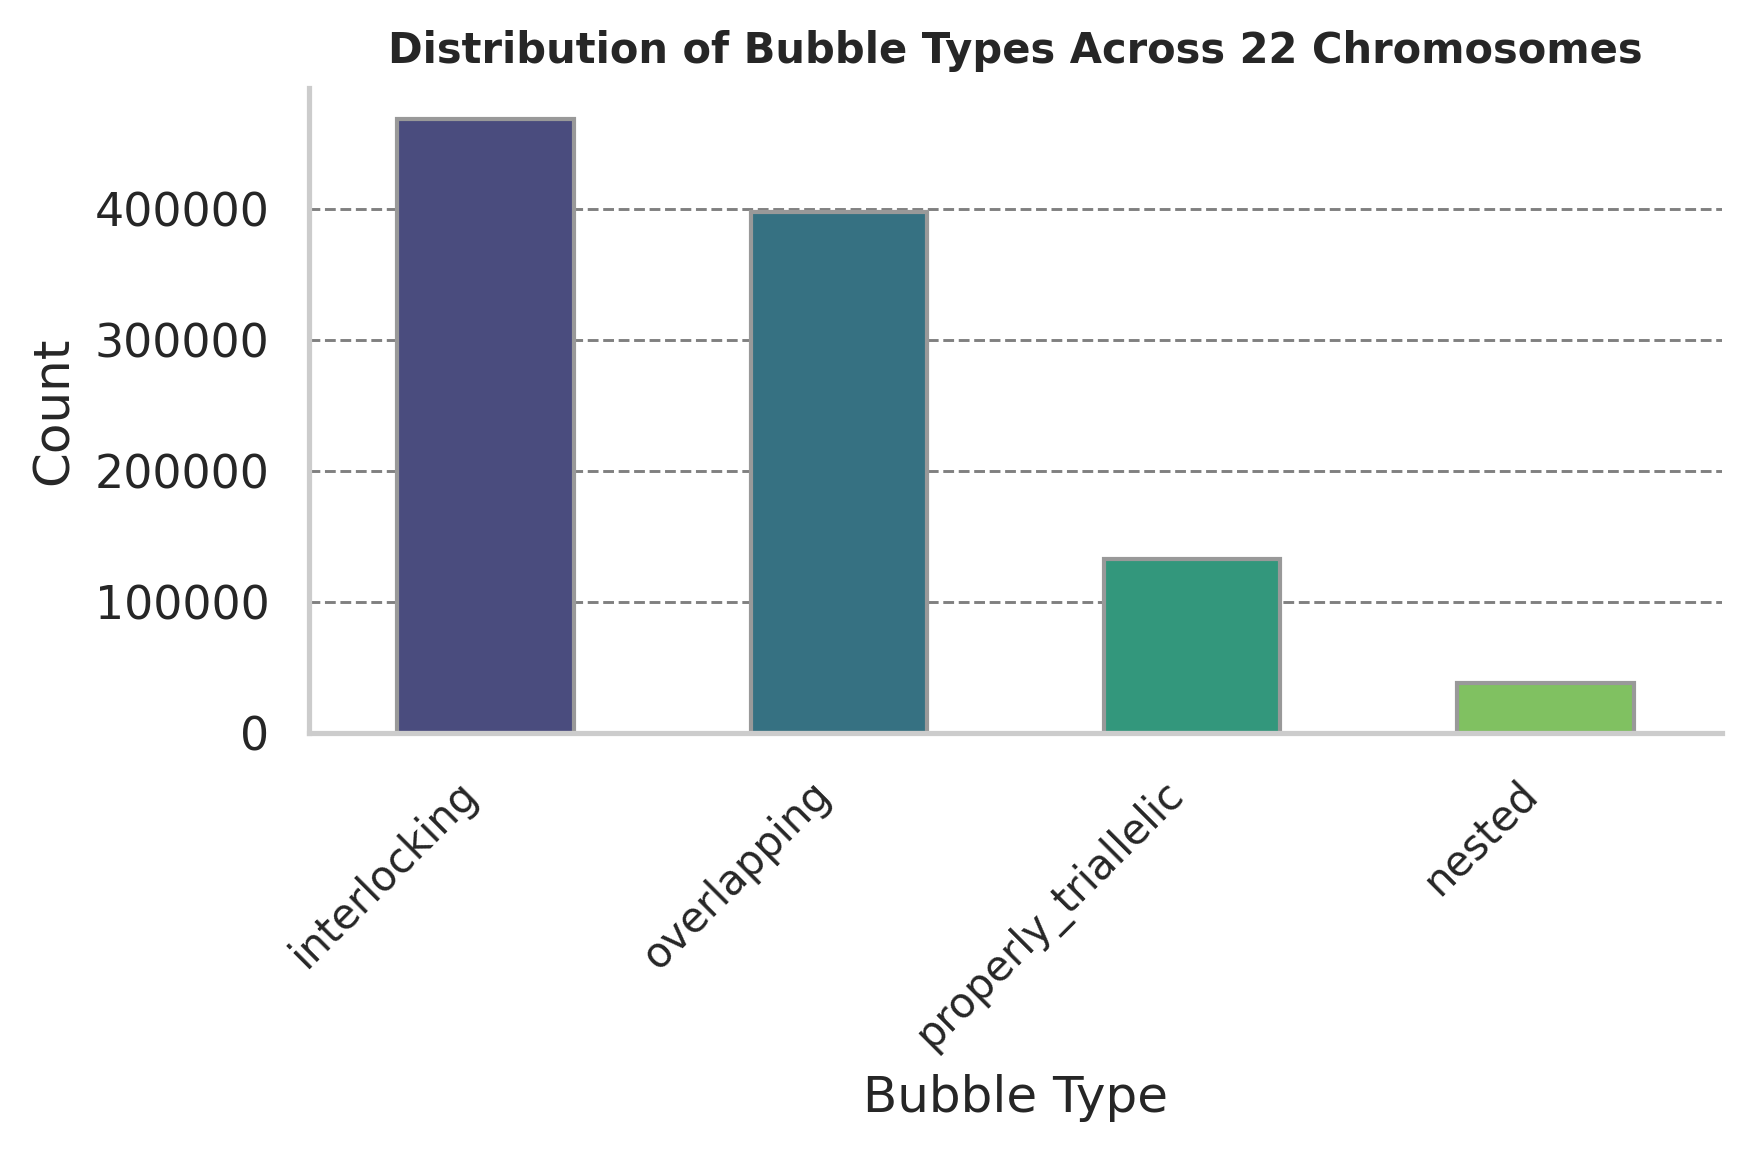

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# Initialize a defaultdict to count bubble types across files
bubble_type_counts = defaultdict(int)

# Assuming all files are in a directory, you can use glob to get the file paths
file_dir = summary_dir

# Iterate over each file
for i in range(1,23):
    # Read the file into a DataFrame
    file_path = f"{file_dir}/bubble_triallelic_chr{i}.tsv"
    df = pd.read_csv(file_path, sep='\t')  # Assuming tab-separated values, adjust if necessary
    
    # Count the occurrences of each Bubble_type
    bubble_type_count = df['Bubble_type'].value_counts()
    
    # Update the overall bubble type count
    for bubble_type, count in bubble_type_count.items():
        bubble_type_counts[bubble_type] += count

# Convert the defaultdict to a pandas DataFrame for plotting
bubble_type_df = pd.DataFrame(list(bubble_type_counts.items()), columns=['Bubble_type', 'Count'])

# Set a modern style for the plot
sns.set(style="whitegrid", palette="muted")

# Set a smaller figure size to reduce bar width and height
plt.figure(figsize=(6, 4), dpi=300)  # Smaller figure, more compact

# Create the bar plot with a narrower width for the bars
ax = sns.barplot(x='Bubble_type', y='Count', data=bubble_type_df, 
                 palette="viridis", edgecolor=".6", width=0.5)  # Reducing bar width

# Enhance title, labels, and format the plot
ax.set_title('Distribution of Bubble Types Across 22 Chromosomes', fontsize=10, weight='bold')
ax.set_xlabel('Bubble Type', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right", fontsize=10)

# Adjust layout to fit everything neatly
plt.tight_layout()

# Optional: Add gridlines for y-axis for clarity
ax.yaxis.grid(True, color='gray', linestyle='--', linewidth=0.7)
ax.xaxis.grid(False)  # No gridlines for x-axis

# Remove top and right spines for a cleaner look
sns.despine()

# Save the figure as a high-resolution PNG or PDF for use in a paper
plt.savefig('../Charts/bubble_type_distribution.png', format='png')  # Use 'pdf' for vectorized format

# Show the plot
plt.show()

<Figure size 3000x1800 with 0 Axes>

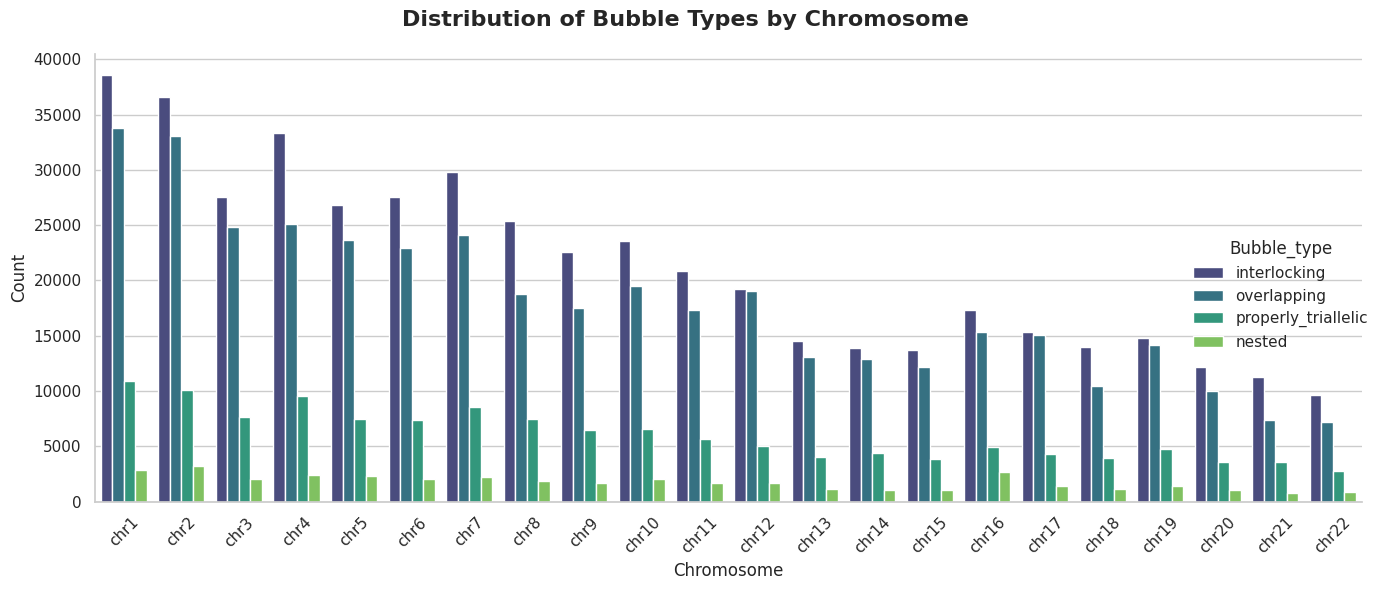

In [21]:
# Initialize a defaultdict to store counts of bubble types by chromosome (represented by files)
bubble_type_chromosome_counts = defaultdict(lambda: defaultdict(int))

# Iterate over each file
for i in range(1,23):
    # Read the file into a DataFrame
    file_path = f"{file_dir}/bubble_triallelic_chr{i}.tsv"
    chromosome = f"chr{i}"
    df = pd.read_csv(file_path, sep='\t')  # Assuming tab-separated values, adjust if necessary

    
    # Count the occurrences of each Bubble_type
    bubble_type_count = df['Bubble_type'].value_counts()
    
    # Update the overall bubble type count for this chromosome
    for bubble_type, count in bubble_type_count.items():
        bubble_type_chromosome_counts[chromosome][bubble_type] += count

# Convert the defaultdict into a DataFrame for easier plotting
data = []
for chromosome, bubble_counts in bubble_type_chromosome_counts.items():
    for bubble_type, count in bubble_counts.items():
        data.append([chromosome, bubble_type, count])

# Create a DataFrame
bubble_type_df = pd.DataFrame(data, columns=['Chromosome', 'Bubble_type', 'Count'])

# Set the plot style
sns.set(style="whitegrid", palette="muted")

# Set the figure size and dpi
plt.figure(figsize=(10, 6), dpi=300)

# Create a bar plot grouped by chromosome (file)
ax = sns.catplot(x='Chromosome', y='Count', hue='Bubble_type',
                 data=bubble_type_df, kind='bar', height=6, aspect=2, palette="viridis")

# Enhance title and labels
ax.set_axis_labels('Chromosome', 'Count')
ax.fig.suptitle('Distribution of Bubble Types by Chromosome', fontsize=16, weight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Save the figure as a high-resolution PNG or PDF for use in a paper
plt.savefig('../Charts/bubble_type_distribution_by_chromosome.png', format='png')

# Show the plot
plt.show()